# Nobel_Laureates

In [1]:
# pip install --upgrade plotly

####  I will be working with this data as means to undertand the working concepts of the past winners of the Nobel Prize Winners. 
#### This is in a bid to understand the patterns in the past Nobel lauretes and what I can learn about the award in general. 

In [2]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [3]:
nobel_df = pd.read_csv('nobel_prize_data.csv')

# Previewing the data
nobel_df.sample(5)

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
508,1980,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for the creation of econometric models and th...",1/1,Individual,Lawrence R. Klein,1920-09-14,"Omaha, NE",United States of America,United States of America,Male,University of Pennsylvania,"Philadelphia, PA",United States of America,USA
612,1990,Physics,The Nobel Prize in Physics 1990,"""for their pioneering investigations concernin...",1/3,Individual,Richard E. Taylor,1929-11-02,"Medicine Hat, Alberta",Canada,Canada,Male,Stanford University,"Stanford, CA",United States of America,CAN
588,1988,Peace,The Nobel Peace Prize 1988,NaN,1/1,Organization,United Nations Peacekeeping Forces,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
611,1990,Physics,The Nobel Prize in Physics 1990,"""for their pioneering investigations concernin...",1/3,Individual,Jerome I. Friedman,1930-03-28,"Chicago, IL",United States of America,United States of America,Male,Massachusetts Institute of Technology (MIT),"Cambridge, MA",United States of America,USA
782,2005,Physics,The Nobel Prize in Physics 2005,"""for their contributions to the development of...",1/4,Individual,Theodor W. Hänsch,1941-10-30,Heidelberg,Germany,Germany,Male,Max-Planck-Institut,Garching,Germany,DEU


In [4]:
# Preliminary exploration of the data

# Checking for the shape of the data. That is, how many columns and rows
print(f'The Nobel laurete data has {nobel_df.shape[0]} rows and {nobel_df.shape[1]} columns')

The Nobel laurete data has 962 rows and 16 columns


In [5]:
# Checking the data schema
nobel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   year                   962 non-null    int64 
 1   category               962 non-null    object
 2   prize                  962 non-null    object
 3   motivation             874 non-null    object
 4   prize_share            962 non-null    object
 5   laureate_type          962 non-null    object
 6   full_name              962 non-null    object
 7   birth_date             934 non-null    object
 8   birth_city             931 non-null    object
 9   birth_country          934 non-null    object
 10  birth_country_current  934 non-null    object
 11  sex                    934 non-null    object
 12  organization_name      707 non-null    object
 13  organization_city      707 non-null    object
 14  organization_country   708 non-null    object
 15  ISO                    

In [6]:
# Fetching some basic information on the data
# First year the award was awarded

# nobel_df.sort_values('year').year # This would give a series of the year
nobel_df.year.min()

# Either of the methods can be used to retreive the year

1901

In [7]:
# The latest year in the available data is:
nobel_df.year.max()

2020

In [8]:
# Checking for duplicates
nobel_df.duplicated().values.any()

False

In [9]:
# Checking for null values
print(f'Are there any missing values in the Nobel laureate dataset? {nobel_df.isna().values.any()}')
print(f'There are {nobel_df.isna().values.sum()} missing values in the dataset')

Are there any missing values in the Nobel laureate dataset? True
There are 1023 missing values in the dataset


In [10]:
# Checking for the columns with the NaN values
for category in nobel_df.columns:
    print(category, nobel_df[category].isna().values.sum())
    
# OR 

nobel_df.isna().sum()

year 0
category 0
prize 0
motivation 88
prize_share 0
laureate_type 0
full_name 0
birth_date 28
birth_city 31
birth_country 28
birth_country_current 28
sex 28
organization_name 255
organization_city 255
organization_country 254
ISO 28


year 0
category 0
prize 0
motivation 88
prize_share 0
laureate_type 0
full_name 0
birth_date 28
birth_city 31
birth_country 28
birth_country_current 28
sex 28
organization_name 255
organization_city 255
organization_country 254
ISO 28
dtype: int64

In [11]:
# Finding out the reason for the NaN values
missing_motivation = nobel_df[nobel_df.motivation.isna() == True]
missing_birthdate = nobel_df[nobel_df.birth_date.isna() == True]
organization_missing = nobel_df[nobel_df.organization_name.isna() == True]
organization_missing

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE
7,1902,Literature,The Nobel Prize in Literature 1902,"""the greatest living master of the art of hist...",1/1,Individual,Christian Matthias Theodor Mommsen,1817-11-30,Garding,Schleswig (Germany),Germany,Male,NaN,NaN,NaN,DEU
9,1902,Peace,The Nobel Peace Prize 1902,NaN,1/2,Individual,Charles Albert Gobat,1843-05-21,Tramelan,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932,2018,Peace,The Nobel Peace Prize 2018,“for their efforts to end the use of sexual vi...,1/2,Individual,Nadia Murad,1993-07-02,Kojo,Iraq,Iraq,Female,NaN,NaN,NaN,IRQ
942,2019,Literature,The Nobel Prize in Literature 2019,“for an influential work that with linguistic ...,1/1,Individual,Peter Handke,1942-12-06,Griffen,Austria,Austria,Male,NaN,NaN,NaN,AUT
946,2019,Peace,The Nobel Peace Prize 2019,“for his efforts to achieve peace and internat...,1/1,Individual,Abiy Ahmed Ali,1976-08-15,Beshasha,Ethiopia,Ethiopia,Male,NaN,NaN,NaN,ETH
954,2020,Literature,The Nobel Prize in Literature 2020,“for her unmistakable poetic voice that with a...,1/1,Individual,Louise Glück,1943-04-22,"New York, NY",United States of America,United States of America,Female,NaN,NaN,NaN,USA


I could see that the motivation column that had null values were recipients of the Peace prize and a few for the Literature category. It didn't say much but it seemed like the Peace award wasn't given on any particular values or why the individual or organization had received the award. 
Also, the columns that had the birth date missing were mostly those of institutions and not individuals. For the missing values for the organization name and city, they were awarded to individuals who were not attached to any organization. 

In [12]:
# Converting the birth_date column to a Pandas Datetime object
nobel_df.birth_date = pd.to_datetime(nobel_df['birth_date'])

In [13]:
# converting the prize_share values to float
share_pct = []
for numbers in nobel_df.prize_share:
    new_list = numbers.split('/')
    float_num = pd.to_numeric(new_list[0])/pd.to_numeric(new_list[1])
    share_pct.append(float_num)

pd.Series(share_pct)

0 1.000000
1 1.000000
2 1.000000
3 0.500000
4 0.500000
 ... 
957 0.333333
958 1.000000
959 0.250000
960 0.250000
961 0.500000
Length: 962, dtype: float64

In [14]:
nobel_df['share_pct'] = share_pct

In [15]:
nobel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   year                   962 non-null    int64         
 1   category               962 non-null    object        
 2   prize                  962 non-null    object        
 3   motivation             874 non-null    object        
 4   prize_share            962 non-null    object        
 5   laureate_type          962 non-null    object        
 6   full_name              962 non-null    object        
 7   birth_date             934 non-null    datetime64[ns]
 8   birth_city             931 non-null    object        
 9   birth_country          934 non-null    object        
 10  birth_country_current  934 non-null    object        
 11  sex                    934 non-null    object        
 12  organization_name      707 non-null    object        
 13  organ


##### Some of the questions I will be trying to find out is: 
###### Is the award biased? How many awards are given to men compared to women? What percentages of all prizes went to women?
###### What are the names of the first three female Nobel laureates?
###### Which categories did they win the prize for? What can I see in their birth_country? Were they part of an organisation?
##### Did some people get a Nobel Prize more than once? 
##### How many categories are the prizes awarded?
#### Which category has the most number of prizes awarded?
##### Which category has the fewest number of prizes?

In [16]:
# Calculating the awards given per gender
award_given_per_gender = nobel_df.sex.value_counts()
award_given_per_gender

Male 876
Female 58
Name: sex, dtype: int64

In [17]:
# Using a pie chart to visualise this

fig = px.pie(award_given_per_gender, values=award_given_per_gender.values, names=award_given_per_gender.index, hole=0.3)
fig.show()

In [18]:
# Names of the first three women

nobel_df[nobel_df.sex == 'Female'].head(3)

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
18,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Poland,Female,NaN,NaN,NaN,POL,0.25
29,1905,Peace,The Nobel Peace Prize 1905,NaN,1/1,Individual,"Baroness Bertha Sophie Felicita von Suttner, n...",1843-06-09,Prague,Austrian Empire (Czech Republic),Czech Republic,Female,NaN,NaN,NaN,CZE,1.00
51,1909,Literature,The Nobel Prize in Literature 1909,"""in appreciation of the lofty idealism, vivid ...",1/1,Individual,Selma Ottilia Lovisa Lagerlöf,1858-11-20,Mårbacka,Sweden,Sweden,Female,NaN,NaN,NaN,SWE,1.00


In [19]:
# Finding the multiple winners of the award

multiple_winners = nobel_df.duplicated(subset=['full_name'], keep=False)
multiple_winners = nobel_df[multiple_winners]
multiple_winners.full_name.nunique() # show the number of winners who have won it twice

col_subset = ['year', 'category', 'laureate_type', 'full_name']
multiple_winners[col_subset]

,year,category,laureate_type,full_name
18,1903,Physics,Individual,"Marie Curie, née Sklodowska"
62,1911,Chemistry,Individual,"Marie Curie, née Sklodowska"
89,1917,Peace,Organization,Comité international de la Croix Rouge (Intern...
215,1944,Peace,Organization,Comité international de la Croix Rouge (Intern...
278,1954,Chemistry,Individual,Linus Carl Pauling
283,1954,Peace,Organization,Office of the United Nations High Commissioner...
297,1956,Physics,Individual,John Bardeen
306,1958,Chemistry,Individual,Frederick Sanger
340,1962,Peace,Individual,Linus Carl Pauling
348,1963,Peace,Organization,Comité international de la Croix Rouge (Intern...


In [20]:
# Finding out the number of categories available. 
nobel_df.category.nunique()

6

In [21]:
# Finding out the number of prizes per category
prizes_per_category = nobel_df.groupby('category', as_index=False).agg({'prize': pd.Series.count})
prizes_per_category

,category,prize
0,Chemistry,186
1,Economics,86
2,Literature,117
3,Medicine,222
4,Peace,135
5,Physics,216


In [22]:
# Creating a bar chart to visualize the prizes per category
fig = px.bar(prizes_per_category, x='category', y='prize', color='prize', color_continuous_scale='Aggrnyl', title='Prizes Per Category')
fig.update_layout(yaxis_title='Total Number of Prizes', xaxis_title='Category', coloraxis_showscale=False)
fig.show()

#### From the look of things the category with the most awards since its inception is the medicine category with 222, followed closely by the physics category. The category with the least number of awards is the economics category. Could that be the reason why the ratio of rich to poor is high? LOL.

In [23]:
# Checking for the first price for Economics

economics_df = nobel_df[nobel_df.category == 'Economics']
economics_df.loc[economics_df.year.idxmin()]

year 1969
category Economics
prize The Sveriges Riksbank Prize in Economic Scienc...
motivation "for having developed and applied dynamic mode...
prize_share 1/2
laureate_type Individual
full_name Jan Tinbergen
birth_date 1903-04-12 00:00:00
birth_city the Hague
birth_country Netherlands
birth_country_current Netherlands
sex Male
organization_name The Netherlands School of Economics
organization_city Rotterdam
organization_country Netherlands
ISO NLD
share_pct 0.5
Name: 393, dtype: object

In [24]:
# Checking the split for men to women for prizes
men_women = nobel_df.groupby(['category', 'sex'], as_index=False).agg({'prize': pd.Series.count}).sort_values('prize', ascending=False)
# men_women

fig = px.bar(men_women, x='category', y='prize', color='sex', title='Split Between Men and Women Per Category')
fig.show()

From the above split, I could see that there was a huge disparity between men and women in the categories. Catgeories like Physics, Chemistry and Economics had very women representation when compared to Medicine, Literature and Peace.

#### In my next set of exploration, I would be observing how the award has changed over time.

In [25]:
# Counting the number of prizes awarded every year

prizes_per_year = nobel_df.groupby('year').agg({'prize': pd.Series.count})
print(prizes_per_year)
rolling_ppy = prizes_per_year.rolling(window=5).mean() # creating a rolling 

      prize
year       
1901      6
1902      7
1903      7
1904      6
1905      5
...     ...
2016     11
2017     12
2018     13
2019     14
2020     12

[117 rows x 1 columns]


In [26]:
nobel_df.year.value_counts()

2001 15
2019 14
1996 13
2018 13
2000 13
 ..
1915 4
1924 3
1914 3
1918 2
1916 1
Name: year, Length: 117, dtype: int64

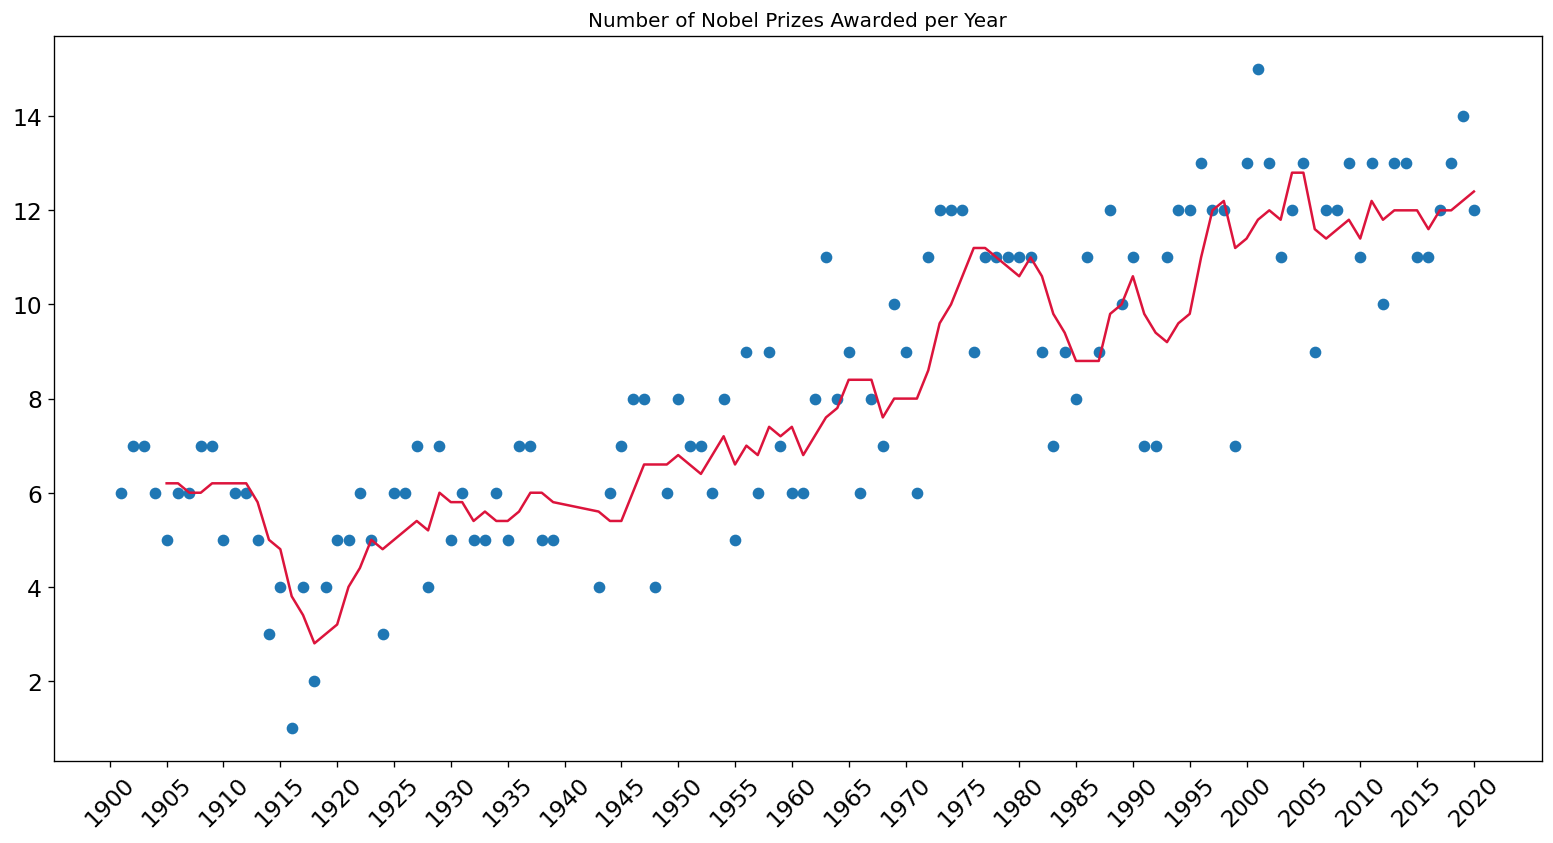

In [27]:


years = np.arange(prizes_per_year.index.min() - 1, prizes_per_year.index.max() + 1, 5)  # To view the ticks on the x-axis for every 5 years


plt.figure(figsize=(16, 8), dpi=120)
plt.title('Number of Nobel Prizes Awarded per Year', fontsize=12)
plt.yticks(fontsize=14)
plt.xticks(ticks=years, fontsize=14, rotation=45)
ax1 = plt.gca()
# ax1.set_xlim(years.min(), years.max())

ax1.plot(prizes_per_year.index, rolling_ppy.prize, c='crimson')
ax1.scatter(prizes_per_year.index, prizes_per_year.prize)
plt.show()

There seems to be a drastic drop in the late 1900s. This was largely due to the World War One that had spanned from 1914 to 1918. After wards there was an uptrend in the number of awards given. There is also a dip in the 1940s and the global event at the time was the World War II. The award is awarded in Stockholm (a city in the middle of both wars)

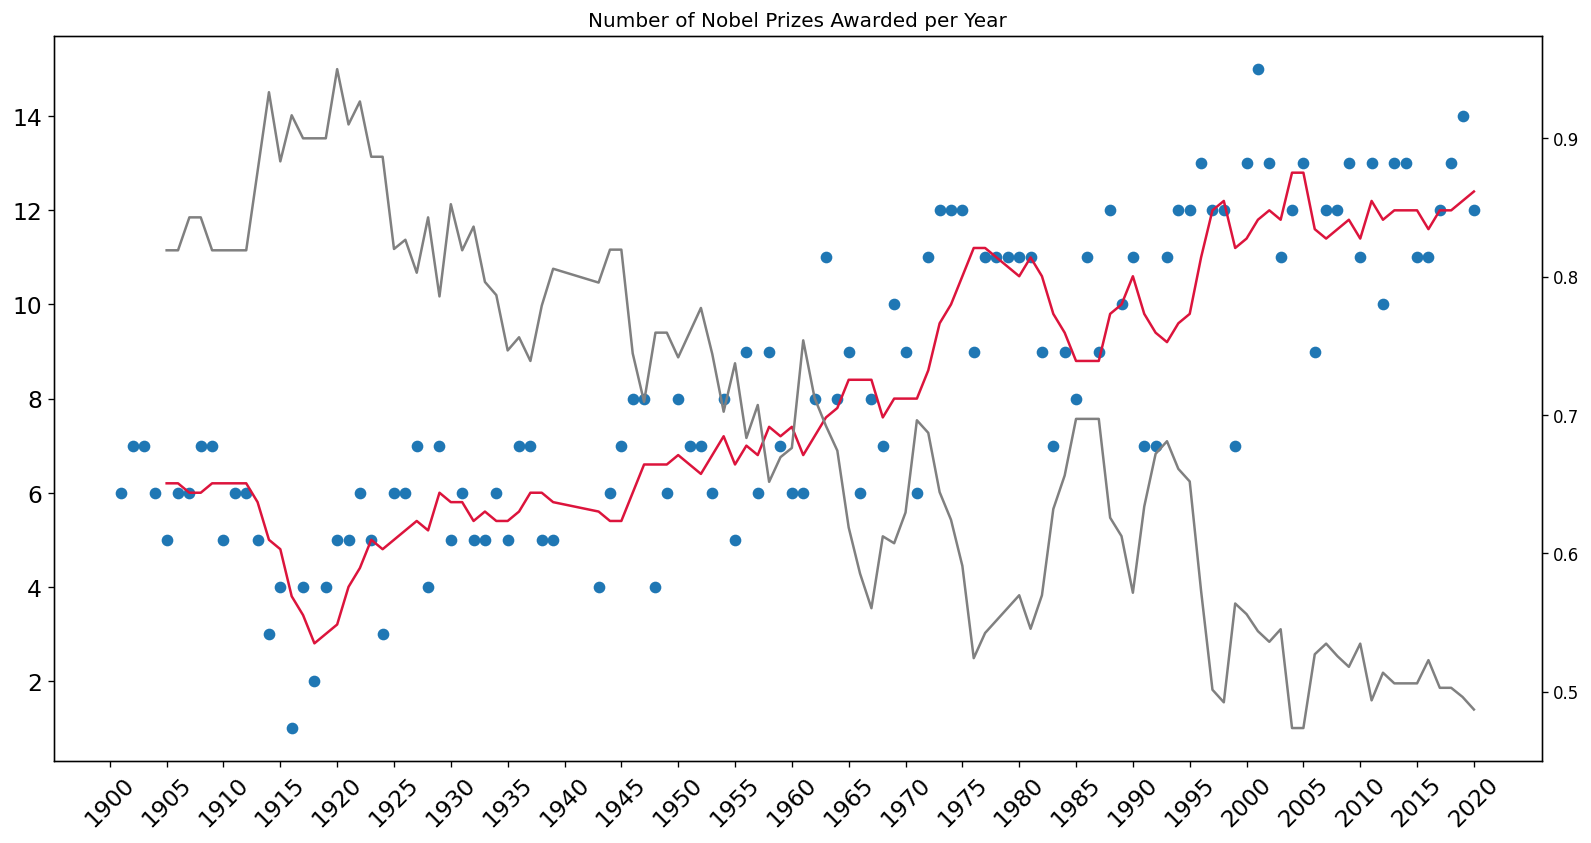

In [28]:
# Finding out the number of prizes shared on average to determine if more awards were shared on average since the awards inception

yearly_avg_share = nobel_df.groupby('year').agg({'share_pct': pd.Series.mean})
share_moving_average = yearly_avg_share.rolling(window=5).mean()


years = np.arange(prizes_per_year.index.min() - 1, prizes_per_year.index.max() + 1, 5)  # To view the ticks on the x-axis for every 5 years


plt.figure(figsize=(16, 8), dpi=120)
plt.title('Number of Nobel Prizes Awarded per Year', fontsize=12)
plt.yticks(fontsize=14)
plt.xticks(ticks=years, fontsize=14, rotation=45)
ax1 = plt.gca()
ax2 = ax1.twinx()
# ax1.set_xlim(years.min(), years.max())

ax1.plot(prizes_per_year.index, rolling_ppy.prize, c='crimson')
ax1.scatter(prizes_per_year.index, prizes_per_year.prize)
ax2.plot(yearly_avg_share.index, share_moving_average.share_pct, c='grey')

plt.show()

### Next, I am going to have a look at the country with the most awards. The categories that each country has won.

In [29]:
# Finding out the top 20 countries

top_20_countries = nobel_df.groupby('birth_country_current', as_index=False).agg({'prize': pd.Series.count}).sort_values('prize', ascending=False)

In [30]:
fig = px.bar(top_20_countries[:20], 
             x='prize', 
             y='birth_country_current', 
             orientation='h',
             title='Top 20 Countries that have won the most awards',
             color='birth_country_current'
            )

fig.update_layout(yaxis_title='Countries',
                 xaxis_title='Number of awards')
fig.show()

    The above visualization shows the top 20 countries that have won the award with the United States leading by a whooping 281 awards as at the time the dataset was collected. This is hundred percent more than the United Kingdom who sits in second position. I will be probing to more into this dataset to see which categories the leading countries have won the most

In [31]:
# Viewing the countries on the cloropeth map.
countries_awards = nobel_df.groupby(['birth_country_current', 'ISO'], as_index=False).agg({'prize': pd.Series.count}).sort_values('prize', ascending=False)
countries_awards

,birth_country_current,ISO,prize
74,United States of America,USA,281
73,United Kingdom,GBR,105
26,Germany,DEU,84
25,France,FRA,57
67,Sweden,SWE,29
...,...,...,...
32,Iceland,ISL,1
47,Madagascar,MDG,1
34,Indonesia,IDN,1
36,Iraq,IRQ,1


In [32]:
fig = px.choropleth(countries_awards, 
                    locations='ISO',
                    color='birth_country_current',
                    hover_name='prize'
                   )

fig.show()

In [33]:
# Checking out the categories won by countries
countries_by_category = nobel_df.groupby(['birth_country_current', 'category'], as_index=False).agg({'prize': pd.Series.count}).sort_values('prize', ascending=False)
# merge the above dataset with the top_20_countries so we can get the total number of prizes to order our bar chart. This is so we can order our chart
merged_df = pd.merge(countries_by_category, top_20_countries, on='birth_country_current')

# renaming the columns so we can easily identify them
merged_df.columns = ['birth_country_current', 'category', 'category_prize', 'total_prize']
merged_df = merged_df.sort_values('total_prize', ascending=False)
# # visualizing the data
fig = px.bar(merged_df[:100], x='category_prize', y='birth_country_current', color='category', orientation='h')
fig.update_layout(xaxis_title='Prizes by Category', yaxis_title='Countries')
fig.show()

The United States of America is leading in every category except for literature that is led by France. The United Kingdom follows closely in terms of categories, however, Germany leads them in the Physics and Literature category with 26, 8 prizes won and 24, 7 won respectively by the United Kingdom. The Netherlands has also featured in five categories with multiple wins in the Physics category winning it 9 times. 

The United states has won more awards in the Physics or Chemistry category than all of France awards put together! Talk about bullying. 

In [34]:
year_country = nobel_df.groupby(['birth_country_current', 'year'], as_index=False).agg({'prize': pd.Series.count})
year_country.head()

,birth_country_current,year,prize
0,Algeria,1957,1
1,Algeria,1997,1
2,Argentina,1936,1
3,Argentina,1947,1
4,Argentina,1980,1


From the above result if we plot the line chart to see number of awards over a given period, the lines will be jagged and show no true increment. For instance, Algeria won two awards as at 1997 but in the line chart it would read as a 1 on both axis and not reflect the true increase. We will need to add the sum of each year to get a better result in our visualization. Taking into effect our desired result should read 'Argentina 1980 3'. That way, the increment/total results can be properly visualised. The line chart below gives an insight into how the result will be viewed if the total results are not added yearly

In [35]:
# The wrong visualization
fig = px.line(year_country, x='year', y='prize', color='birth_country_current')
fig.show()

In [36]:
# Adding the number of prizes over the years unti the last year
# year_country.sort_values('year')[['year', 'birth_country_current', 'prize']]
cumulative_price = year_country.groupby(by=['birth_country_current', 'year']).sum().groupby(level=[0]).cumsum()
cumulative_price = cumulative_price.reset_index()

In [37]:
fig = px.line(cumulative_price, x='year', y='prize', color='birth_country_current', title='Total Number of Awards Won Per Country Over Time')
fig.update_layout(xaxis_title='Year', yaxis_title='Number of Awards')
fig.show()

From the above visualization, we can see that the United States started beating other countries in the 1950s. Could this be due to the war considering Europe was pretty much in chaos? Also, there was a decline in the awards given during the war so that didn't count for much. The gap became monumental in 1958 and has climbed steadily since. Germany and the United Kingdom seemed close and matched each other with 57 awards each in 1974 until the United Kingdom solidified its position in second place only only tying once again 1993 with 71 awards.

#### Moving on, I can see many individuals are associated with institutions. I will be exploring which institutions, cities, have produced the most nobel laureates.

In [38]:
institutions_awards = nobel_df.groupby('organization_name', as_index=False).count().sort_values('prize', ascending=False)[['organization_name', 'prize']][:20]
# institutions_awards
# visualizing the instituion awards
fig = px.bar(institutions_awards, 
             x='prize', 
             y='organization_name', 
             color='organization_name', 
             orientation='h'
            )

fig.update_layout(xaxis_title='Number of Prizes', yaxis_title='Institutions', coloraxis_showscale=False)
fig.show()

The University of California has produced the most winners. The top five institutions are also universities in the United States. But I am unsure if all the winners are all from the United States. The only institution to breach into the top 10 is the University of Cambridge in the United Kingdom. The United States has totally dominated the top 20 institutions. 

In [39]:
# Finding out which city has produced the most awards

city_awards = nobel_df.groupby('organization_city', as_index=False).count()[['organization_city', 'prize']].sort_values('prize', ascending=False)[:20]
city_awards

,organization_city,prize
34,"Cambridge, MA",50
121,"New York, NY",45
33,Cambridge,31
92,London,27
128,Paris,25
156,"Stanford, CA",24
12,"Berkeley, CA",21
39,"Chicago, IL",20
135,"Princeton, NJ",19
129,"Pasadena, CA",17


In [40]:
# Visualizing the top 20

fig = px.bar(city_awards, x='prize', y='organization_city', orientation='h', color='organization_city')
fig.update_layout(xaxis_title='Number of Awards', yaxis_title='Cities')
fig.show()

The number one hotspot for discoveries is in Massachusettes, United States with a total number of 50 prizes won. The top two cities in Europe are London and Paris with 27 and 25 awards respectively.

## Now drilling down to birth cities to compare

In [41]:
city_per_award = nobel_df.groupby(['birth_city', 'birth_country_current'], as_index=False).count()[['birth_city', 'birth_country_current', 'prize']].sort_values('prize', ascending=False)[:20]
city_per_award

,birth_city,birth_country_current,prize
383,"New York, NY",United States of America,53
419,Paris,France,26
314,London,United Kingdom,19
574,Vienna,Austria,14
112,"Chicago, IL",United States of America,12
48,Berlin,Germany,11
592,"Washington, DC",United States of America,8
76,"Brooklyn, NY",United States of America,8
80,Budapest,Hungary,8
64,"Boston, MA",United States of America,8


In [42]:
# Visualizing the birth city
fig = px.bar(city_per_award, x='prize', y='birth_city', orientation='h', color='birth_city')
fig.update_layout(xaxis_title='Number of Awards', yaxis_title='Birth Cities')
fig.show()

There is a wide variance with the birth cities and the institutions that have won the most awards. New York in the United States still holds the top spot but it doesn't reflect that most of the recipients were awarded while in Cambridge, Massachusetts. A total number of 53 people were born in New York, followed closely by Paris (26), London (19) and Vienna (14). The United State's dominance is not so much reflective here as only two of its cities are in the top 5. 

In [43]:
# Calculating the percentage New York contributes to the overall awards people from the United States have won. 
us_perc = city_per_award[city_per_award.birth_country_current == 'United States of America']
us_perc.prize.max() / us_perc.prize.sum() * 100

55.208333333333336

In [44]:
sunburst_data = nobel_df.groupby(['organization_name', 'organization_country', 'organization_city'], as_index=False).agg({'prize': pd.Series.count}).sort_values('prize', ascending=False)
sunburst_data

,organization_name,organization_country,organization_city,prize
71,Harvard University,United States of America,"Cambridge, MA",29
185,Stanford University,United States of America,"Stanford, CA",23
121,Massachusetts Institute of Technology (MIT),United States of America,"Cambridge, MA",21
222,University of Chicago,United States of America,"Chicago, IL",20
215,University of California,United States of America,"Berkeley, CA",19
...,...,...,...,...
120,Marine Biological Laboratory (MBL),United States of America,"Woods Hole, MA",1
122,Max-Planck Institut,Germany,Berlin,1
124,Max-Planck Institut,Germany,Heidelberg,1
125,Max-Planck-Institut,Germany,Berlin,1


In [45]:
fig = px.sunburst(sunburst_data, 
                  path=['organization_country', 'organization_city', 'organization_name'], 
                  values='prize',
                # color='prize', 
                  # color_continuous_scale='RdBu',
                  title='Where Do Discoveries Take Place?',
                  color_continuous_midpoint=np.average(sunburst_data['prize'], weights=sunburst_data['prize'])
                 )
fig.show()

#### Now, I want to find out the age of the winners and see if that has any influence on the awards or the categories

In [46]:
birth_years = nobel_df.birth_date.dt.year
birth_years

0 1852.0
1 1839.0
2 1854.0
3 1822.0
4 1828.0
 ... 
957 1949.0
958 NaN
959 1965.0
960 1952.0
961 1931.0
Name: birth_date, Length: 962, dtype: float64

In [47]:
b_year = []
for year in nobel_df.birth_date:
    b_year.append(year.year)
b_year = pd.Series(b_year)

In [48]:
winning_year = nobel_df.year - b_year
nobel_df['winning_year'] = winning_year

In [49]:
# Finding the oldest and youngest winner
print(nobel_df.loc[nobel_df.winning_year.idxmin()]) # The youngest winner
print("==============================================================")
print(nobel_df.loc[nobel_df.winning_year.idxmax()]) # The oldest winner

year                                                                  2014
category                                                             Peace
prize                                           The Nobel Peace Prize 2014
motivation               "for their struggle against the suppression of...
prize_share                                                            1/2
laureate_type                                                   Individual
full_name                                                 Malala Yousafzai
birth_date                                             1997-07-12 00:00:00
birth_city                                                         Mingora
birth_country                                                     Pakistan
birth_country_current                                             Pakistan
sex                                                                 Female
organization_name                                                      NaN
organization_city        

In [50]:
# Finding out the average age of a winner

nobel_df.winning_year.describe()

count 934.000000
mean 59.948608
std 12.617785
min 17.000000
25% 51.000000
50% 60.000000
75% 69.000000
max 97.000000
Name: winning_year, dtype: float64

From the above analysis, I can tell that the youngest recipient is 17. The award was given to Malala Yousafzai for the Peace category. The oldest was 97 in the Chemistry category and was awarded to John Goodenough. The average age is 59.94 which is approximately 60 years old. This goes to show that there is a deep sense of accomplishment amongst laureates as they would have attained a certain level of sophistication in their respective fields. 

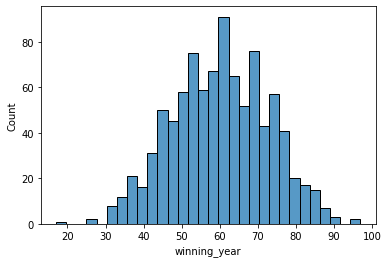

In [51]:
# Visualizing the age at the time of winning

sns.histplot(data=nobel_df, x='winning_year', bins=30)
plt.show()

Investigating if Nobel laureates are being nominated later in life than before? Have the ages of laureates at the time of the award increased or decreased over time?

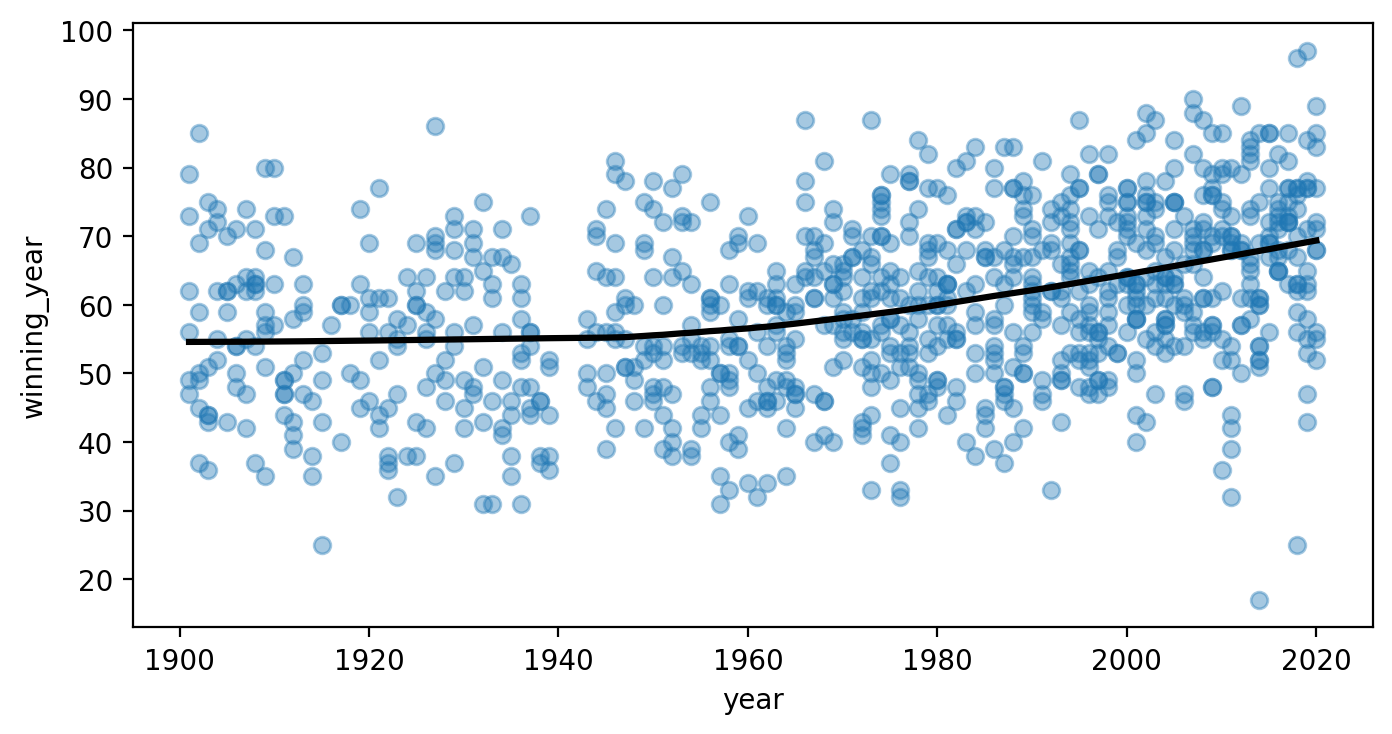

In [52]:
plt.figure(figsize=(8, 4), dpi=200)
sns.regplot(data=nobel_df, x='year', y='winning_year', lowess=True, scatter_kws={'alpha': 0.4}, line_kws={'color': 'black'})
plt.show()

Looking at the best fit line Nobel laureates had an age of 50-54 years in the 1900s to 1940s. As the years progressed, the age increased and moved closer to 70 years in the late 2020. 

Investigating the age of laureates by category

In [53]:
# Using plotly to visualise how the ages of laureates vary by category

fig = px.box(nobel_df, x='category', y='winning_year', color='category')
fig.show()

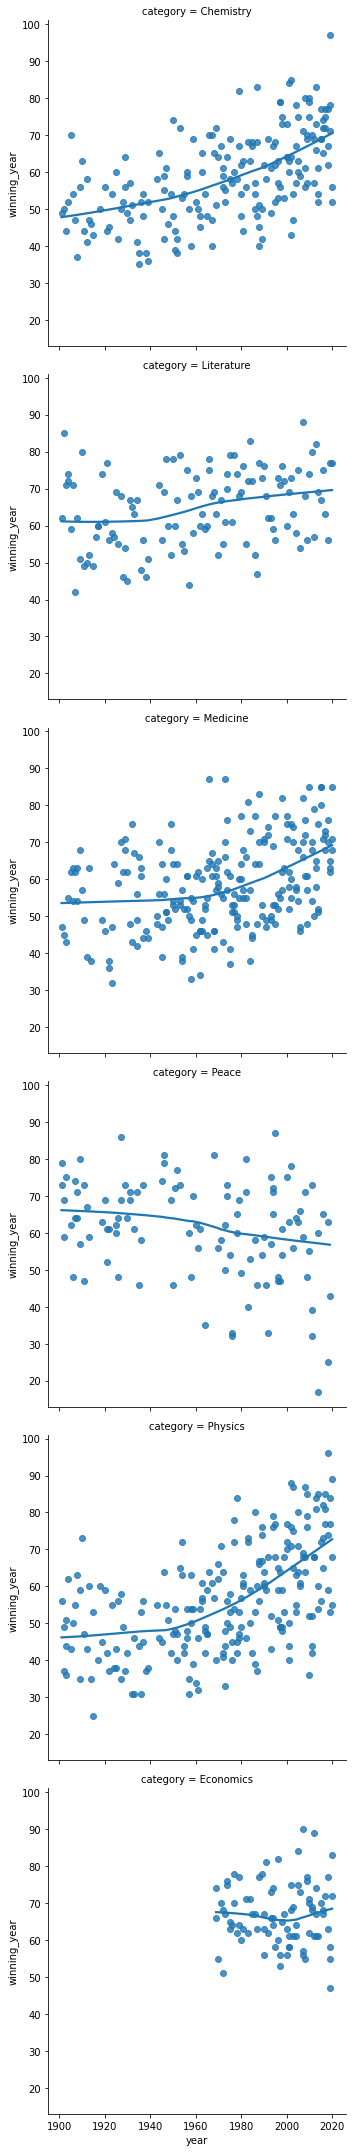

In [54]:
sns.lmplot(data=nobel_df, x='year', y='winning_year', row='category', lowess=True)
plt.show()

Looking at the age of the categories, I can see that the age trend for the categories has gone up over the years. The category with the most obvious spike is the Physics category, which had a winning age of 49 up until the 1960s and had finally spiked up to 70 years in the year 2020. The category which is fairly recent and has managed to steady along the 68-70 years for winners is the Economics category. The Peace category has seen a decline amongst winners with winning age of 69 at the start of the award to 60 at the end time of the dataset. 

The other categories have also maintained a steady climb like the Physics category. 

In contrast to the boxplot above, the boxplot gives descriptive statistics of the various categories and their winning ages. The category with the least median age is Medicine with 57 years. Chemistry has the category with the maximum median age (68). 

<Figure size 1600x800 with 0 Axes>

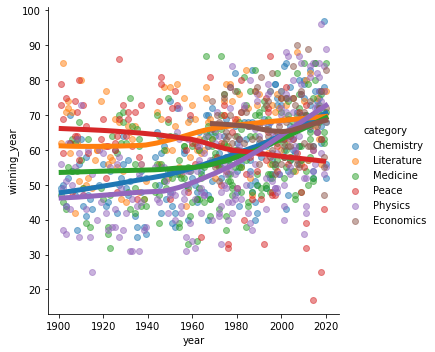

In [55]:
plt.figure(figsize=(8, 4), dpi=200)
sns.lmplot(data=nobel_df, x='year', y='winning_year', hue='category', lowess=True, scatter_kws={'alpha': 0.5},  line_kws={'linewidth': 5})
plt.show()